In [234]:
import warnings
from collections import Counter

import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tpot import TPOTClassifier

warnings.filterwarnings('ignore')

In [197]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [198]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [200]:
df.shape

(1309, 12)

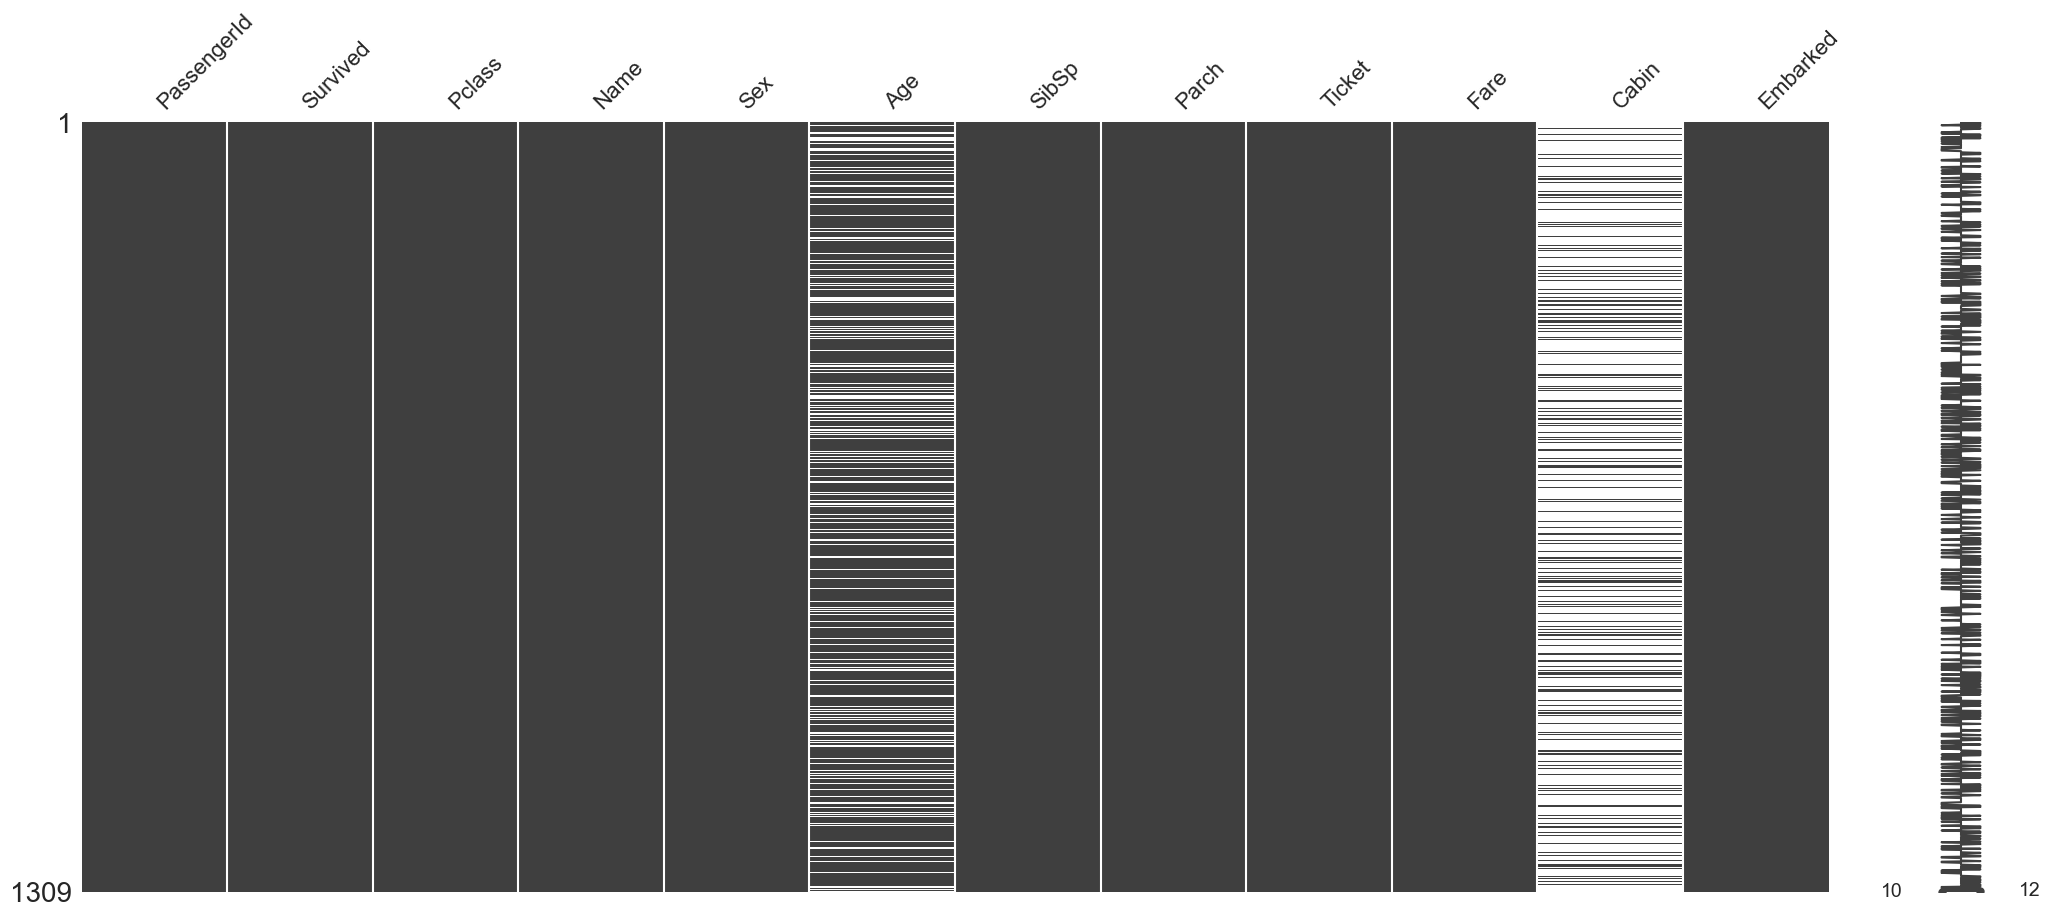

In [201]:
missingno.matrix(df);

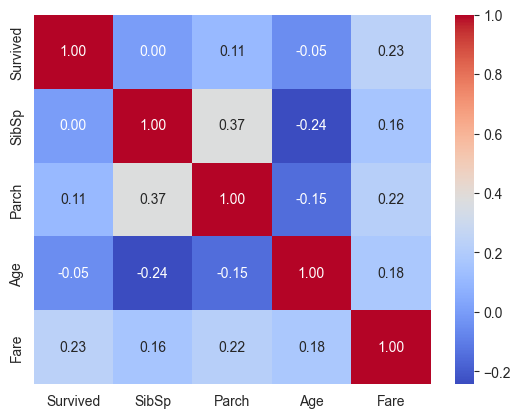

In [202]:
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm');

In [203]:
df['SibSp'].value_counts(dropna=False)

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [204]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.520376
2,2,0.452381
0,0,0.334456
3,3,0.250000
4,4,0.181818
5,5,0.166667
6,8,0.111111


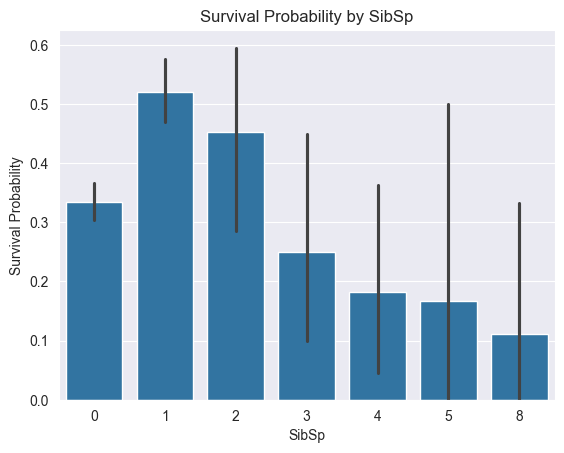

In [205]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp');

In [206]:
df['Parch'].value_counts(dropna=False)

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [207]:
df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.625000
1,1,0.547059
2,2,0.530973
7,9,0.500000
4,4,0.333333
0,0,0.331337
5,5,0.166667
6,6,0.000000


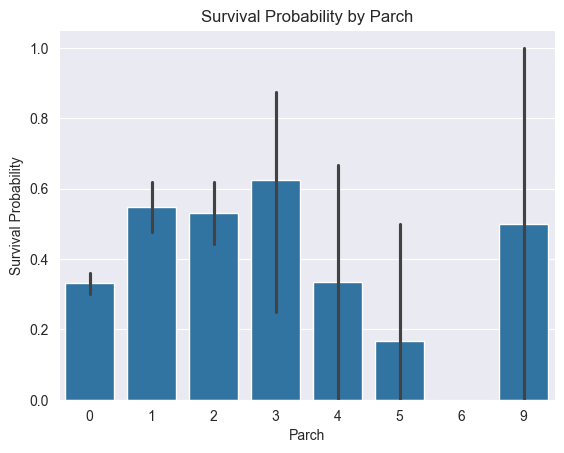

In [208]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch');

In [209]:
df['Age'].isnull().sum()

263

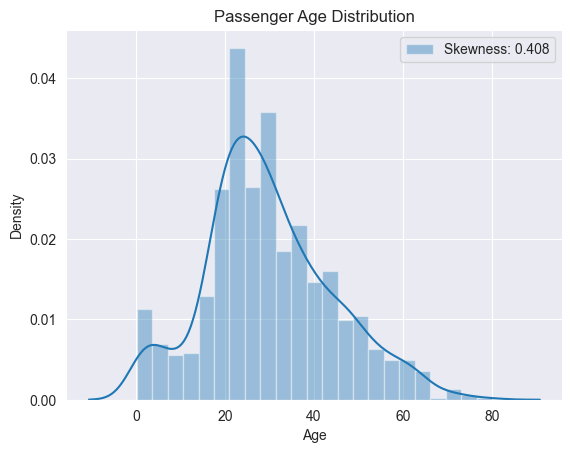

In [210]:
sns.distplot(df['Age'], label='Skewness: %.3f' % (df['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution');

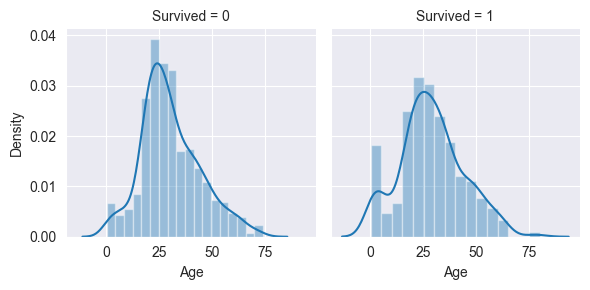

In [211]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age');

In [212]:
df['Fare'].isnull().sum()

1

Text(0, 0.5, 'Passenger Fare Distribution')

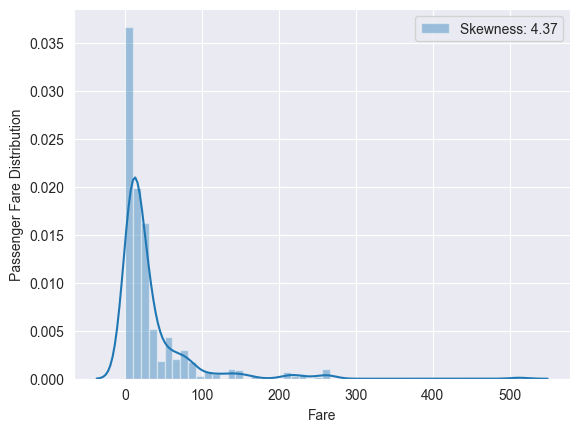

In [213]:
sns.distplot(df['Fare'], label='Skewness: %.2f' % (df['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')

In [214]:
df.drop(columns=['Ticket', 'Cabin', 'Name'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,8.0500,S
1305,1306,1,1,female,39.0,0,0,108.9000,C
1306,1307,0,3,male,38.5,0,0,7.2500,S
1307,1308,0,3,male,NaN,0,0,8.0500,S


In [215]:
df.isnull().sum().sort_values(ascending=False)

Age            263
Embarked         2
Fare             1
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [216]:
mode = df['Embarked'].dropna().mode()[0]
mode

'S'

In [217]:
df['Embarked'].fillna(mode, inplace=True)

In [218]:
df.isnull().sum().sort_values(ascending=False)

Age            263
Fare             1
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [219]:
median = df['Fare'].dropna().median()
median

14.4542

In [220]:
df['Fare'].fillna(median, inplace=True)

In [221]:
df.isnull().sum().sort_values(ascending=False)

Age            263
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

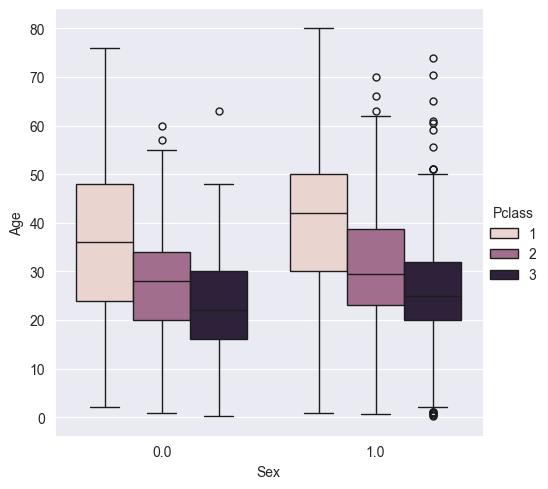

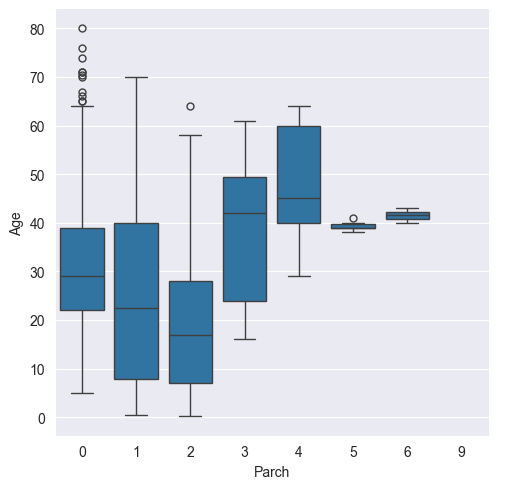

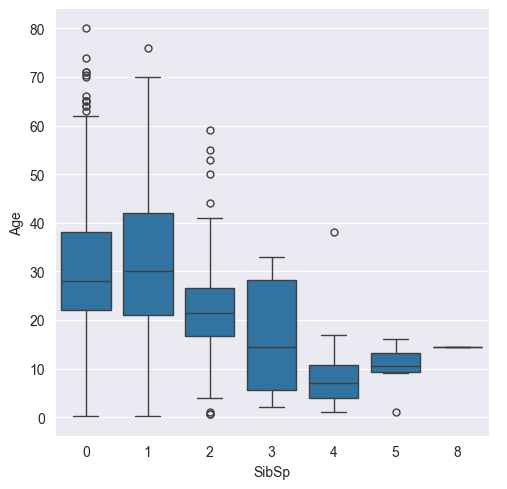

In [222]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']).astype(float)

sns.catplot(y='Age', x='Sex', hue='Pclass', kind='box', data=df)
sns.catplot(y='Age', x='Parch', kind='box', data=df)
sns.catplot(y='Age', x='SibSp', kind='box', data=df);

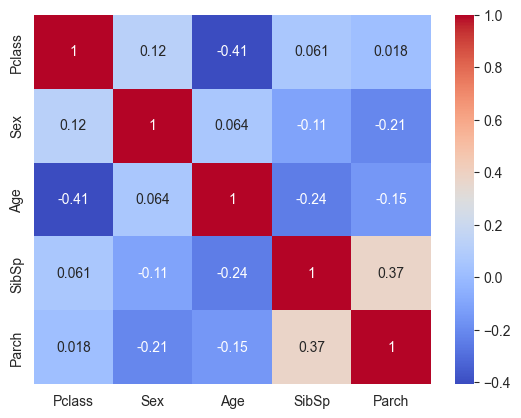

In [223]:
sns.heatmap(df.drop(['Survived', 'PassengerId', 'Fare', 'Embarked'], axis=1).corr(), annot=True, cmap='coolwarm');

In [225]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers


outliers_to_drop = detect_outliers(df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 13 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863, 944, 1079, 1251]


In [226]:
df.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,1.0,19.0,3,2,263.00,S
88,89,1,1,0.0,23.0,3,2,263.00,S
159,160,0,3,1.0,NaN,8,2,69.55,S
180,181,0,3,0.0,NaN,8,2,69.55,S
201,202,0,3,1.0,NaN,8,2,69.55,S
324,325,0,3,1.0,NaN,8,2,69.55,S
341,342,1,1,0.0,24.0,3,2,263.00,S
792,793,0,3,0.0,NaN,8,2,69.55,S
846,847,0,3,1.0,NaN,8,2,69.55,S
863,864,0,3,0.0,NaN,8,2,69.55,S


In [227]:
print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(df)))

Before: 1309 rows
After: 1296 rows


In [228]:
df = pd.get_dummies(df, columns=['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,22.0,1,0,7.2500,False,False,True
1,2,1,1,0.0,38.0,1,0,71.2833,True,False,False
2,3,1,3,0.0,26.0,0,0,7.9250,False,False,True
3,4,1,1,0.0,35.0,1,0,53.1000,False,False,True
4,5,0,3,1.0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1291,1305,0,3,1.0,NaN,0,0,8.0500,False,False,True
1292,1306,1,1,0.0,39.0,0,0,108.9000,True,False,False
1293,1307,0,3,1.0,38.5,0,0,7.2500,False,False,True
1294,1308,0,3,1.0,NaN,0,0,8.0500,False,False,True


In [229]:
scaler = StandardScaler()
columns = df.columns
df[[name for name in df.columns if name not in ['PassengerId', 'Survived']]] = scaler.fit_transform(
    df[[name for name in df.columns if name not in ['PassengerId', 'Survived']]])
df = pd.DataFrame(data=df, columns=columns)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0.84395,0.740532,-0.549022,0.679526,-0.431766,-0.498517,-0.512989,-0.32382,0.659709
1,2,1,-1.54678,-1.350381,0.560052,0.679526,-0.431766,0.774775,1.949359,-0.32382,-1.515820
2,3,1,0.84395,-1.350381,-0.271753,-0.531844,-0.431766,-0.485095,-0.512989,-0.32382,0.659709
3,4,1,-1.54678,-1.350381,0.352101,0.679526,-0.431766,0.413203,-0.512989,-0.32382,0.659709
4,5,0,0.84395,0.740532,0.352101,-0.531844,-0.431766,-0.482609,-0.512989,-0.32382,0.659709
...,...,...,...,...,...,...,...,...,...,...,...
1291,1305,0,0.84395,0.740532,NaN,-0.531844,-0.431766,-0.482609,-0.512989,-0.32382,0.659709
1292,1306,1,-1.54678,-1.350381,0.629370,-0.531844,-0.431766,1.522777,1.949359,-0.32382,-1.515820
1293,1307,0,0.84395,0.740532,0.594711,-0.531844,-0.431766,-0.498517,-0.512989,-0.32382,0.659709
1294,1308,0,0.84395,0.740532,NaN,-0.531844,-0.431766,-0.482609,-0.512989,-0.32382,0.659709


In [230]:
X = df[[name for name in df.columns if name not in ['PassengerId', 'Survived']]]
y = df['Survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [231]:
model = TPOTClassifier(generations=20, population_size=50, verbosity=3, n_jobs=-1)
model.fit(X_train, y_train)

best_params = model.fitted_pipeline_.get_params()

32 operators have been imported by TPOT.
Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	0.8596939619520265	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by RandomForestClassifier..

Generation 2 - Current Pareto front scores:

-1	0.8674110835401156	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.8, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
_

In [232]:
best_params

{'memory': None,
 'steps': [('robustscaler', RobustScaler()),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=False, criterion='entropy',
                          max_features=0.9000000000000001, min_samples_leaf=8,
                          min_samples_split=4))],
 'verbose': False,
 'robustscaler': RobustScaler(),
 'randomforestclassifier': RandomForestClassifier(bootstrap=False, criterion='entropy',
                        max_features=0.9000000000000001, min_samples_leaf=8,
                        min_samples_split=4),
 'robustscaler__copy': True,
 'robustscaler__quantile_range': (25.0, 75.0),
 'robustscaler__unit_variance': False,
 'robustscaler__with_centering': True,
 'robustscaler__with_scaling': True,
 'randomforestclassifier__bootstrap': False,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_feat

In [233]:
model.export('tpot_test.py')

In [235]:
class_model = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.9000000000000001, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
class_model.fit(X_train, y_train)
results = class_model.predict(X_test)
accuracy_score(y_test, results)

0.8807692307692307

In [236]:
val_data = class_model.predict(X_val)
accuracy_score(y_val, val_data)

0.8223938223938224